<a href="https://colab.research.google.com/github/russkarki7/Concept-and-technology-of-ai/blob/main/RussKarki_Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.Exercise 1 - Implementation of Naive Bayes Algorithm
Build a Sentiment Analysis Model for IMDB Movie Review Dataset

Dataset : IMDB Movie Review is available in shared drive.

Question:
You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
using the IMDB Movie Review Dataset.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/concept and technogoly of AI/Week10/imdb_top_1000.csv')

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub('[^a-z]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['clean_review'] = df['Overview'].apply(preprocess_text)

df[['Overview', 'clean_review']].head()

,Overview,clean_review
0,Two imprisoned men bond over a number of years...,two imprisoned men bond over a number of years...
1,An organized crime dynasty's aging patriarch t...,an organized crime dynasty s aging patriarch t...
2,When the menace known as the Joker wreaks havo...,when the menace known as the joker wreaks havo...
3,The early life and career of Vito Corleone in ...,the early life and career of vito corleone in ...
4,A jury holdout attempts to prevent a miscarria...,a jury holdout attempts to prevent a miscarria...


In [8]:
df['label'] = (df['IMDB_Rating'] >= 8.0).astype(int)

In [9]:
def simple_stem(word):
    for suffix in ['ing', 'edly', 'edly', 'ed', 'ly', 's']:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            return word[:-len(suffix)]
    return word

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    text = str(text).lower()

    # Remove non-alphabetic characters
    text = re.sub('[^a-z]', ' ', text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords + apply stemming
    tokens = [
        simple_stem(word)
        for word in tokens
        if word not in ENGLISH_STOP_WORDS
    ]

    return ' '.join(tokens)

df['clean_review'] = df['Overview'].apply(preprocess_text)

df[['Overview', 'clean_review']].head()

,Overview,clean_review
0,Two imprisoned men bond over a number of years...,imprison men bond number year find solace even...
1,An organized crime dynasty's aging patriarch t...,organiz crime dynasty s aging patriarch transf...
2,When the menace known as the Joker wreaks havo...,menace known joker wreak havoc chao people got...
3,The early life and career of Vito Corleone in ...,ear life career vito corleone s new york city ...
4,A jury holdout attempts to prevent a miscarria...,jury holdout attempt prevent miscarriage justi...


In [11]:
# Recreate label
df['label'] = (df['IMDB_Rating'] >= 8.0).astype(int)

# Recreate X and y
X = df['clean_review']
y = df['label']

# Re-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

Part 2:

1.Evaluate the performance of the model using the following metrics:

a. Accuracy

b. Precision, Recall, and F1-score

c. Confusion Matrix

d. ROC-AUC Score

In [16]:
y_pred = nb_model.predict(X_test_bow)
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.475


In [18]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       107
           1       0.42      0.37      0.39        93

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



In [19]:
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:

[[61 46]
 [59 34]]


In [20]:
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.4726158175057783


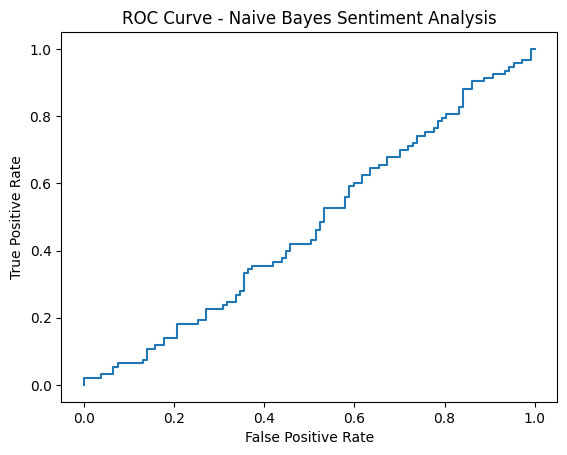

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Sentiment Analysis')
plt.show()

3 Feature Selection Exercise.

3.1 Feature Selection using Wrapper Methods.

Dataset: Breast Cancer Prognostic Dataset

Objective

You are tasked with identifying the most important features in predicting breast cancer prognosis using the
Breast Cancer Prognostic Dataset from the UCI Machine Learning Repository. Apply a wrapper method
(Recursive Feature Elimination) to select the best features and evaluate your model’s performance.

Part 1: Data Loading and Preprocessing

1. Load the Breast Cancer Prognostic Dataset.

2. Dataset is available in Drive.

3. Perform basic exploratory data analysis (EDA) to understand the dataset:

• Summarize key statistics for each feature.

• Check for missing values and handle them appropriately.

4. Split the dataset into training (80%) and testing (20%) sets.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Drive (change path)
df = pd.read_csv("/content/drive/MyDrive/concept and technogoly of AI/Week10/Breast_Cancer.csv")

print(df.head())
print(df.shape)

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [24]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [25]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [26]:
df = df.fillna(df.median(numeric_only=True))

In [27]:
# Change target column name if different
target_col = "Status"

X = df.drop(columns=[target_col])
y = df[target_col]

In [28]:
# Target column
target_col = "Status"

# Features
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target: Alive = 0, Dead = 1
y = y.map({"Alive": 0, "Dead": 1})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # converts strings to numeric

# Now split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Shape of X_train_scaled:", X_train_scaled.shape)

Preprocessing complete. Shape of X_train_scaled: (3219, 29)


Part 2: Apply a Wrapper Method

1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:

• Select the top 5 features that contribute the most to predicting the target variable.

• Visualize the ranking of features.

2. Train the Logistic Regression model using only the selected features.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Use the encoded and scaled features
log_reg = LogisticRegression(max_iter=5000)

rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Use X_encoded.columns (not original X.columns)
selected_features = X_encoded.columns[rfe.support_]
ranking = rfe.ranking_

print("Top 5 Selected Features:")
print(selected_features)

Top 5 Selected Features:
Index(['Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'differentiate_Poorly differentiated', 'Progesterone Status_Positive'],
      dtype='object')


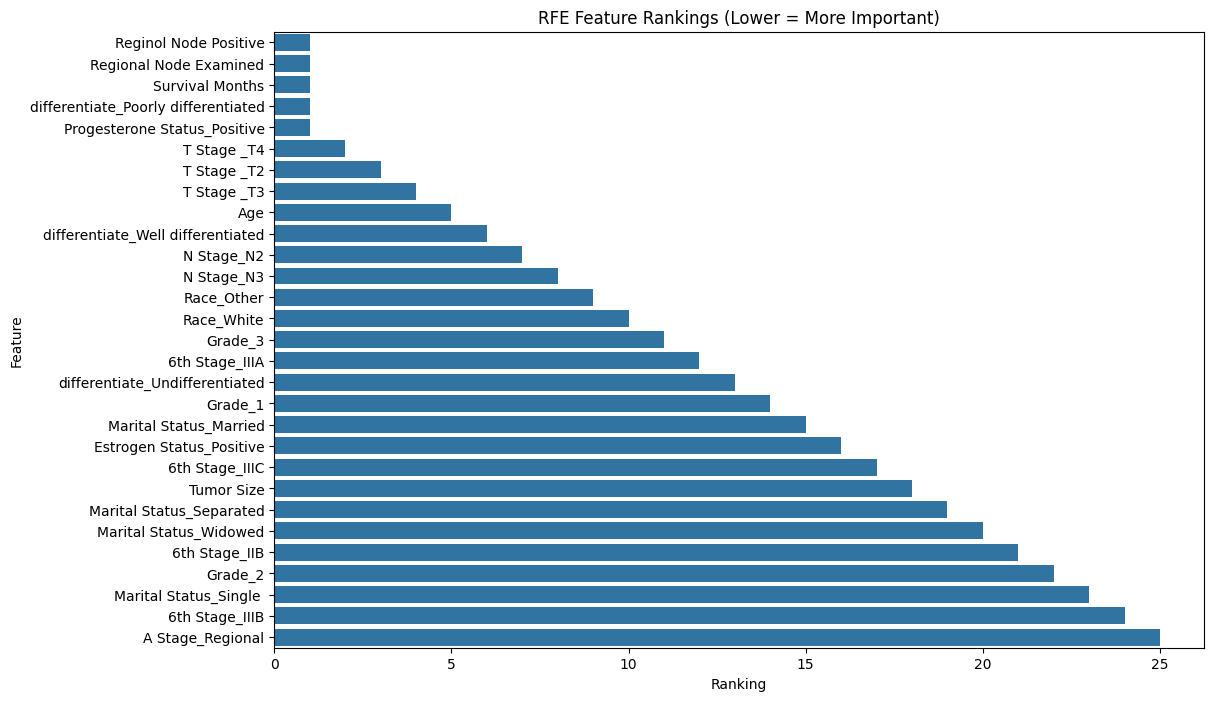

In [30]:
X_encoded.shape
ranking.shape
# Correct ranking dataframe
ranking_df = pd.DataFrame({
    "Feature": X_encoded.columns,  # use encoded column names
    "Ranking": ranking
}).sort_values(by="Ranking")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x="Ranking", y="Feature", data=ranking_df)
plt.title("RFE Feature Rankings (Lower = More Important)")
plt.show()

In [31]:
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

log_reg_rfe = LogisticRegression(max_iter=5000)
log_reg_rfe.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=5000)

Part 3: Model Evaluation

1. Evaluate the model’s performance using the testing set:

• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

2. Compare the performance of the model trained on all features versus the model trained on the selected
features.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

In [33]:
log_reg_full = LogisticRegression(max_iter=5000)
log_reg_full.fit(X_train_scaled, y_train)

full_results = evaluate_model(log_reg_full, X_test_scaled, y_test)
print("Full Feature Model Performance:")
full_results

Full Feature Model Performance:


{'Accuracy': 0.893167701863354,
 'Precision': 0.7534246575342466,
 'Recall': 0.44715447154471544,
 'F1-Score': 0.5612244897959183,
 'ROC-AUC': np.float64(0.8527287032401116)}

In [34]:
rfe_results = evaluate_model(log_reg_rfe, X_test_rfe, y_test)
print("RFE (Top 5 Features) Model Performance:")
rfe_results

RFE (Top 5 Features) Model Performance:


{'Accuracy': 0.884472049689441,
 'Precision': 0.7027027027027027,
 'Recall': 0.42276422764227645,
 'F1-Score': 0.5279187817258884,
 'ROC-AUC': np.float64(0.8441456262069952)}

In [35]:
comparison_df = pd.DataFrame([full_results, rfe_results],
                              index=["All Features", "Top 5 RFE"])

comparison_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
All Features,0.893168,0.753425,0.447154,0.561224,0.852729
Top 5 RFE,0.884472,0.702703,0.422764,0.527919,0.844146


Part 4: Experiment

1. Experiment with different numbers of selected features (e.g., top 3, top 7).

2. Discuss how feature selection affects model performance.

In [36]:
rfe_3 = RFE(log_reg, n_features_to_select=3)
rfe_3.fit(X_train_scaled, y_train)

X_train_3 = X_train_scaled[:, rfe_3.support_]
X_test_3 = X_test_scaled[:, rfe_3.support_]

log_reg_3 = LogisticRegression(max_iter=5000)
log_reg_3.fit(X_train_3, y_train)

results_3 = evaluate_model(log_reg_3, X_test_3, y_test)
print("Top 3 Features Performance:")
results_3

Top 3 Features Performance:


{'Accuracy': 0.8795031055900621,
 'Precision': 0.6911764705882353,
 'Recall': 0.3821138211382114,
 'F1-Score': 0.49214659685863876,
 'ROC-AUC': np.float64(0.8421011849414681)}

In [37]:
rfe_7 = RFE(log_reg, n_features_to_select=7)
rfe_7.fit(X_train_scaled, y_train)

X_train_7 = X_train_scaled[:, rfe_7.support_]
X_test_7 = X_test_scaled[:, rfe_7.support_]

log_reg_7 = LogisticRegression(max_iter=5000)
log_reg_7.fit(X_train_7, y_train)

results_7 = evaluate_model(log_reg_7, X_test_7, y_test)
print("Top 7 Features Performance:")
results_7

Top 7 Features Performance:


{'Accuracy': 0.8869565217391304,
 'Precision': 0.7162162162162162,
 'Recall': 0.43089430894308944,
 'F1-Score': 0.5380710659898477,
 'ROC-AUC': np.float64(0.845421166821639)}

In [38]:
experiment_df = pd.DataFrame(
    [full_results, results_3, rfe_results, results_7],
    index=["All Features", "Top 3", "Top 5", "Top 7"]
)

experiment_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
All Features,0.893168,0.753425,0.447154,0.561224,0.852729
Top 3,0.879503,0.691176,0.382114,0.492147,0.842101
Top 5,0.884472,0.702703,0.422764,0.527919,0.844146
Top 7,0.886957,0.716216,0.430894,0.538071,0.845421
